### Student details 

Name: **Siddharth Prince**  
ID: **23052058**

#### Housekeeping code for imports

In [1]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

Defining the length of an individual.

In [2]:
# Length of an individual with each bit in the bit string representing an iten's selection for the knapsack or not.
INDIVIDUAL_LENGTH = 100

Defining random value and weight combinations for the knapsack.

In [3]:
NBR_ITEMS = 100
MAX_WEIGHT = 1000

# set the random seed. Make sure you do this BEFORE creating the knapsack
# creating the knapsack
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Create the item dictionary: item name is an integer, and value is
# a (value, weight) 2-uple.

items = {}

# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
     items[i] = (random.randint(1, 10), random.randint(1, 100))
print(items)

{0: (2, 4), 1: (5, 32), 2: (4, 18), 3: (2, 87), 4: (9, 12), 5: (10, 55), 6: (1, 4), 7: (2, 28), 8: (4, 65), 9: (10, 4), 10: (9, 26), 11: (9, 54), 12: (4, 58), 13: (10, 36), 14: (1, 98), 15: (3, 90), 16: (7, 44), 17: (5, 20), 18: (4, 98), 19: (6, 14), 20: (2, 49), 21: (2, 46), 22: (6, 78), 23: (5, 6), 24: (8, 69), 25: (2, 49), 26: (2, 71), 27: (5, 81), 28: (10, 47), 29: (10, 25), 30: (2, 6), 31: (4, 99), 32: (5, 11), 33: (4, 13), 34: (7, 36), 35: (8, 82), 36: (6, 21), 37: (6, 46), 38: (4, 86), 39: (5, 90), 40: (2, 78), 41: (3, 69), 42: (4, 21), 43: (8, 49), 44: (5, 82), 45: (9, 29), 46: (6, 99), 47: (1, 30), 48: (1, 41), 49: (7, 35), 50: (2, 28), 51: (10, 92), 52: (6, 28), 53: (8, 51), 54: (8, 19), 55: (5, 18), 56: (4, 96), 57: (9, 69), 58: (5, 96), 59: (10, 55), 60: (10, 52), 61: (6, 29), 62: (3, 66), 63: (8, 12), 64: (1, 15), 65: (3, 81), 66: (3, 88), 67: (7, 77), 68: (2, 50), 69: (7, 77), 70: (8, 68), 71: (5, 71), 72: (1, 88), 73: (2, 88), 74: (9, 97), 75: (5, 99), 76: (6, 15), 77: (

Defining the toolbox and fitness evaluation function in order to setup the GA.

In [4]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(5.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, INDIVIDUAL_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def knapsackFitness(individual):
    value, weight = 0, 0
    for i in range(INDIVIDUAL_LENGTH):
        if individual[i] == 1:
            value += items[i][0]
            weight += items[i][1]
    # Adding a penalty mechanic so that it does not select indiviuduals that go above the max weight
    if weight > MAX_WEIGHT:
        return (-1*value),
    return value,

toolbox.register("evaluate", knapsackFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=10)

# Two-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/INDIVIDUAL_LENGTH)

Wrapping the GA into a function so that it can be called for multiple combinations of crossover and mutations probabilities.

In [5]:
def performGeneticExperiment(POPULATION_SIZE=500, P_CROSSOVER=0.7, P_MUTATION=0.01, MAX_GENERATIONS=1000):
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0
    sameForGensCounter = 0
    lastGenMaxFitness = 0
    
    # calculate fitness tuple for each individual in the population:
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue
        
    # extract fitness values from all individuals in population:
    fitnessValues = [individual.fitness.values[0] for individual in population]
    
    # initialize statistics accumulators:
    maxFitnessValues = []
    meanFitnessValues = []
    
    def getIndividualKnapsackMetrics(individual):
        value, weight = 0, 0
        for i in range(INDIVIDUAL_LENGTH):
            if individual[i] == 1:
                value += items[i][0]
                weight += items[i][1]
        return value, weight
    
    # main evolutionary loop:
    # stop if max fitness value reached the known max value
    # OR if number of generations exceeded the preset value:
    while sameForGensCounter <= 500 and generationCounter < MAX_GENERATIONS:
        
        # update counter:
        generationCounter = generationCounter + 1
    
        # apply the selection operator, to select the next generation's individuals:
        offspring = toolbox.select(population, len(population))
        # clone the selected individuals:
        offspring = list(map(toolbox.clone, offspring))
    
        # apply the crossover operator to pairs of offspring:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
    
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue
    
        # replace the current population with the offspring:
        population[:] = offspring
    
        # collect fitnessValues into a list, update statistics and print:
        fitnessValues = [ind.fitness.values[0] for ind in population]
        # print(fitnessValues)
    
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))
        # Stop if the max fitness is the same for 50 generations straight
        if max(fitnessValues) == lastGenMaxFitness:
            sameForGensCounter += 1 
        else:
            sameForGensCounter = 0
        lastGenMaxFitness = maxFitness
    
        # find and print best individual:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_index])
        bestValue, bestWeight = getIndividualKnapsackMetrics(population[best_index])
        print(f"Best individual's knapsack value: {bestValue}, best individual's knapsack weight: {bestWeight}", "\n")

    return maxFitnessValues, meanFitnessValues

Defining the code to plot the max and mean fitness values in a function. 

In [6]:
def plotMetrics(maxFitnessValues, meanFitnessValues):
    # Genetic Algorithm is done - plot statistics:
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()

## Setup #1
Probability for crossover = 0.7  
Probability for mutating an individual = 0.01  
Max generations = 1000

Max observed fitness after 1000 generations: 266 with a corresponding knapsack weight of 998.

In [7]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.7 # probability for crossover
P_MUTATION = 0.01 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -144.0, Avg Fitness = -217.73
Best Individual =  1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
Best individual's knapsack value: 144, best individual's knapsack weight: 1476 

- Generation 2: Max Fitness = -126.0, Avg Fitness = -183.842
Best Individual =  0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1
Best individual's knapsack value: 126, best individual's knapsack weight: 1645 

- Generation 3: Max Fitness = -110.0, Avg Fitness = -156.568
Best Individual =  0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1

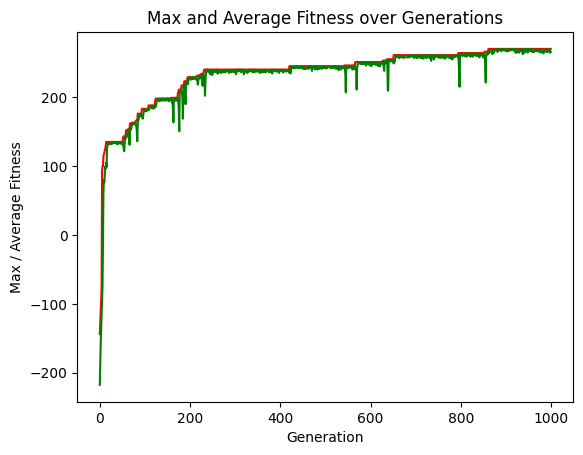

In [8]:
plotMetrics(maxFitnessValues, meanFitnessValues)

## Setup #2
Probability for crossover = 0.7  
Probability for mutating an individual = 0.1  
Max generations = 1000

Max observed fitness after 1000 generations: 279 with a corresponding knapsack weight of 998.

In [84]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.7 # probability for crossover
P_MUTATION = 0.1 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -133.0, Avg Fitness = -215.246
Best Individual =  0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1
Best individual's knapsack weight: 1335 

- Generation 2: Max Fitness = 109.0, Avg Fitness = -178.596
Best Individual =  0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1
Best individual's knapsack weight: 946 

- Generation 3: Max Fitness = 116.0, Avg Fitness = -142.106
Best Individual =  0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1
Best individual's knapsack weight: 954 

- Generation 4: Max Fitness = 121.0, A

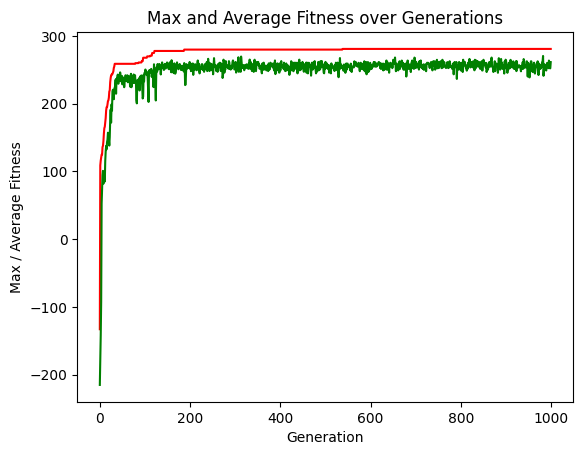

In [85]:
plotMetrics(maxFitnessValues, meanFitnessValues)

## Setup #3
Probability for crossover = 0.6  
Probability for mutating an individual = 0.1  
Max generations = 1000

Max observed fitness after 1000 generations: 276 with a corresponding knapsack weight of 997.

In [86]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.6 # probability for crossover
P_MUTATION = 0.1 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -144.0, Avg Fitness = -219.034
Best Individual =  0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
Best individual's knapsack weight: 1953 

- Generation 2: Max Fitness = -112.0, Avg Fitness = -180.222
Best Individual =  0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
Best individual's knapsack weight: 1830 

- Generation 3: Max Fitness = -106.0, Avg Fitness = -146.898
Best Individual =  1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
Best individual's knapsack weight: 1190 

- Generation 4: Max Fitness = -81.

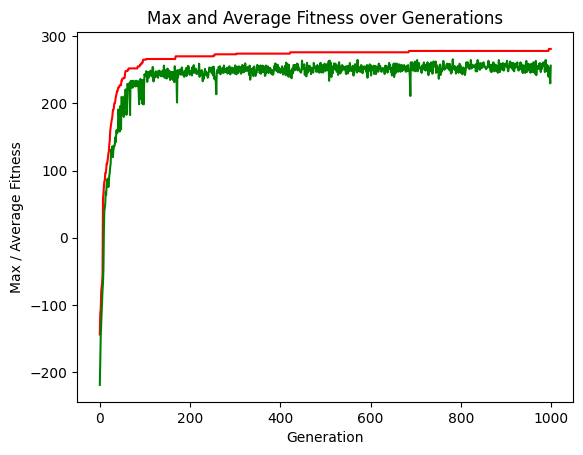

In [87]:
plotMetrics(maxFitnessValues, meanFitnessValues)

## Setup #4
Probability for crossover = 0.8  
Probability for mutating an individual = 0.2  
Max generations = 1000

Max observed fitness after 1000 generations: 278 with a corresponding knapsack weight of 993.

In [88]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.8 # probability for crossover
P_MUTATION = 0.2 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -140.0, Avg Fitness = -219.592
Best Individual =  0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1
Best individual's knapsack weight: 1946 

- Generation 2: Max Fitness = -119.0, Avg Fitness = -183.606
Best Individual =  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1
Best individual's knapsack weight: 1553 

- Generation 3: Max Fitness = -104.0, Avg Fitness = -151.916
Best Individual =  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1
Best individual's knapsack weight: 1308 

- Generation 4: Max Fitness = -90.

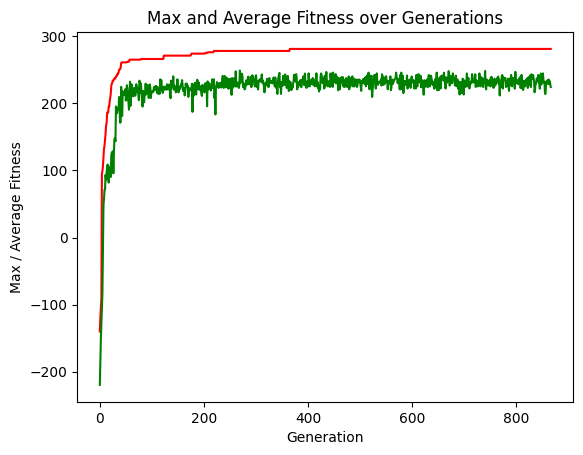

In [89]:
plotMetrics(maxFitnessValues, meanFitnessValues)

## Setup #5
Probability for crossover = 0.9  
Probability for mutating an individual = 0.5  
Max generations = 1000

Max observed fitness: 281 with a corresponding knapsack weight of 998.

In [95]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.9 # probability for crossover
P_MUTATION = 0.5 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -141.0, Avg Fitness = -218.22
Best Individual =  1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
Best individual's knapsack weight: 1539 

- Generation 2: Max Fitness = -130.0, Avg Fitness = -185.454
Best Individual =  1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0
Best individual's knapsack weight: 1778 

- Generation 3: Max Fitness = 115.0, Avg Fitness = -157.76
Best Individual =  1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
Best individual's knapsack weight: 891 

- Generation 4: Max Fitness = 133.0, A

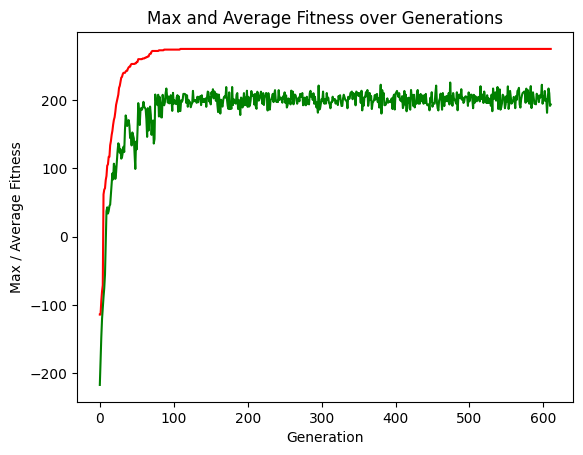

In [93]:
plotMetrics(maxFitnessValues, meanFitnessValues)

### Trying to minimize the weight in addition to maximising values

Trying to see if getting the GA to recognise that a lower weight along with the max possible value is a better solution. Hence, I'm changing the evaluation function to reduce the returned fitness value based on the current weight.

In [21]:
def knapsackFitnessNew(individual):
    value, weight = 0, 0
    for i in range(INDIVIDUAL_LENGTH):
        if individual[i] == 1:
            value += items[i][0]
            weight += items[i][1]
    # Adding a penalty mechanic so that it does not select indiviuduals that go above the max weight
    if weight > MAX_WEIGHT:
        return (-1*value),
    return (value-(weight*0.15)), # Trying to incentivise a lower weight as well.

toolbox.register("evaluate", knapsackFitnessNew)

## Setup #6
Probability for crossover = 0.8  
Probability for mutating an individual = 0.1  
Max generations = 1000

Max observed fitness: 281 with a corresponding knapsack weight of 1000.

In [12]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.8 # probability for crossover
P_MUTATION = 0.1 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -154.0, Avg Fitness = -217.462
Best Individual =  1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0
Best individual's knapsack value: 154, best individual's knapsack weight: 1721 

- Generation 2: Max Fitness = -115.0, Avg Fitness = -182.18
Best Individual =  0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
Best individual's knapsack value: 115, best individual's knapsack weight: 2099 

- Generation 3: Max Fitness = -102.0, Avg Fitness = -154.012
Best Individual =  0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0

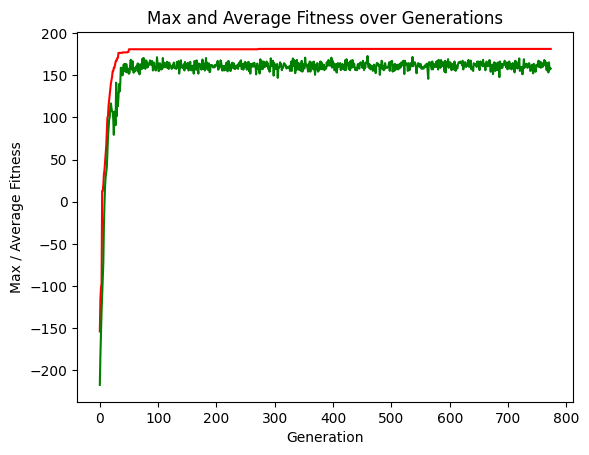

In [13]:
plotMetrics(maxFitnessValues, meanFitnessValues)

### Observation:
We can see immediately that the GA has come as close as possible to our previous best of 281 by significantly decreasing the weight of the knapsack to 986 instead of having to carry 999. 

## Setup #7
Probability for crossover = 0.8  
Probability for mutating an individual = 0.4  
Max generations = 1000

Max observed fitness: 281 with a corresponding knapsack weight of 991.

In [16]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.8 # probability for crossover
P_MUTATION = 0.4 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -164.0, Avg Fitness = -218.36
Best Individual =  1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0
Best individual's knapsack value: 164, best individual's knapsack weight: 1690 

- Generation 2: Max Fitness = -138.0, Avg Fitness = -189.772
Best Individual =  1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1
Best individual's knapsack value: 138, best individual's knapsack weight: 1494 

- Generation 3: Max Fitness = -124.0, Avg Fitness = -164.886
Best Individual =  1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0

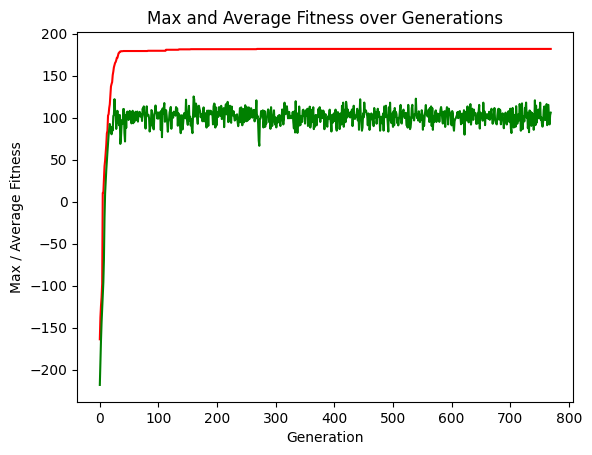

In [17]:
plotMetrics(maxFitnessValues, meanFitnessValues)

## Setup #8
Probability for crossover = 0.8  
Probability for mutating an individual = 0.35 
Max generations = 1000

Max observed fitness: 280 with a corresponding knapsack weight of 984.

In [22]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.8 # probability for crossover
P_MUTATION = 0.5 # probability for mutating an individual
MAX_GENERATIONS = 1000
maxFitnessValues, meanFitnessValues = performGeneticExperiment(POPULATION_SIZE, P_CROSSOVER, P_MUTATION, MAX_GENERATIONS)

- Generation 1: Max Fitness = -151.0, Avg Fitness = -219.936
Best Individual =  0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
Best individual's knapsack value: 151, best individual's knapsack weight: 1618 

- Generation 2: Max Fitness = -121.0, Avg Fitness = -187.32
Best Individual =  1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
Best individual's knapsack value: 121, best individual's knapsack weight: 1612 

- Generation 3: Max Fitness = -107.0, Avg Fitness = -154.78
Best Individual =  0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0


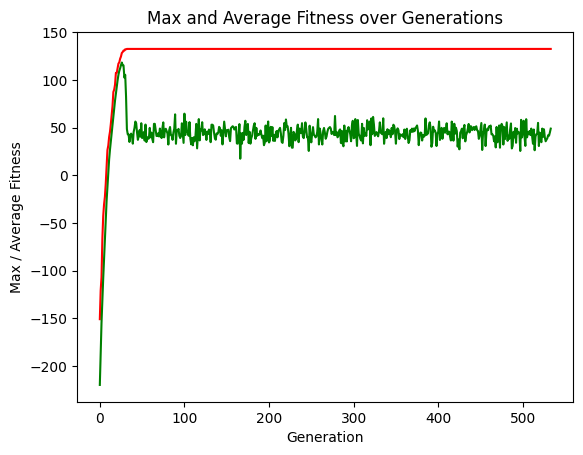

In [23]:
plotMetrics(maxFitnessValues, meanFitnessValues)

### Final observations:
A GA can get a close enough solution to such problems such as the knapsack problem and can be used to optimise for both maximum value as well as minimum weight for the knapsack. From my test setups, the maximum value for the knapsack achieved is **281**. If minimisation of weight is also to be considered, the best solution observed so far has been a maximum value of **280** and a minimum weight of **984**.

### Further thoughts
From most of the graphs we can see that the fitness converges very fast and stays stagnant for many generations. Hence, I had the thought that this might be falling into a local maxima trap. Recalling the paper from this week, it might be worthwhile to implement a co-parasite mechanism to see if the results can be further improved.